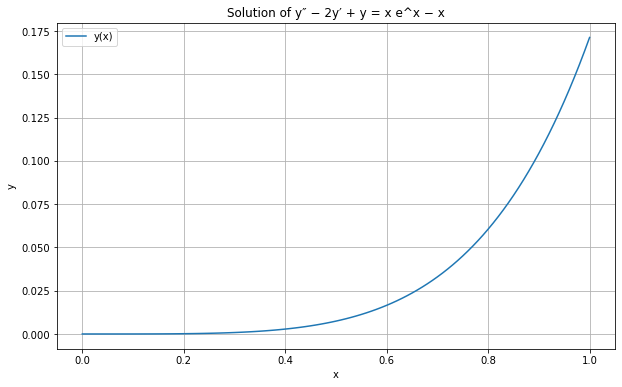

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equations
def f(x, y1, y2):
    return y2

def g(x, y1, y2):
    return 2*y2 - y1 + x*np.exp(x) - x

# Initial conditions
x0 = 0
y1_0 = 0
y2_0 = 0
h = 0.01  # Step size
x_end = 1

# Number of steps
N = int((x_end - x0) / h)

# Initialize arrays to store the results
x_values = np.zeros(N+1)
y1_values = np.zeros(N+1)
y2_values = np.zeros(N+1)

# Set initial values
x_values[0] = x0
y1_values[0] = y1_0
y2_values[0] = y2_0

# Runge-Kutta method
for i in range(N):
    k1 = h * f(x_values[i], y1_values[i], y2_values[i])
    l1 = h * g(x_values[i], y1_values[i], y2_values[i])
    
    k2 = h * f(x_values[i] + h/2, y1_values[i] + k1/2, y2_values[i] + l1/2)
    l2 = h * g(x_values[i] + h/2, y1_values[i] + k1/2, y2_values[i] + l1/2)
    
    k3 = h * f(x_values[i] + h/2, y1_values[i] + k2/2, y2_values[i] + l2/2)
    l3 = h * g(x_values[i] + h/2, y1_values[i] + k2/2, y2_values[i] + l2/2)
    
    k4 = h * f(x_values[i] + h, y1_values[i] + k3, y2_values[i] + l3)
    l4 = h * g(x_values[i] + h, y1_values[i] + k3, y2_values[i] + l3)
    
    y1_values[i+1] = y1_values[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    y2_values[i+1] = y2_values[i] + (l1 + 2*l2 + 2*l3 + l4) / 6
    x_values[i+1] = x_values[i] + h

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(x_values, y1_values, label='y(x)')
plt.title('Solution of y″ − 2y′ + y = x e^x − x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


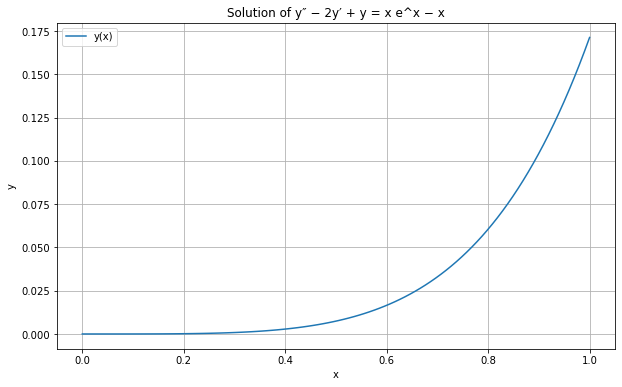

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equations
def f(x, y):
    return y[1], 2*y[1] - y[0] + x*np.exp(x) - x

# Initial conditions
x0 = 0
y0 = [0, 0]
x_end = 1

# Solve the differential equation
sol = solve_ivp(f, (x0, x_end), y0, t_eval=np.linspace(x0, x_end, 100))

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='y(x)')
plt.title('Solution of y″ − 2y′ + y = x e^x − x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
